In [12]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [13]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((x_train.shape[0], -1)) / 255.0
x_test = x_test.reshape((x_test.shape[0], -1)) / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [14]:
# build model with SGD optimizer method
model_sgd = Sequential()
model_sgd.add(Dense(128, input_shape=(784,), activation='relu'))
model_sgd.add(Dense(10, activation='softmax'))
sgd_optimizer = SGD(learning_rate=0.01)
model_sgd.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history_sgd = model_sgd.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test), verbose=0)

In [15]:
# build model with Adam optimizer method
model_adam = Sequential()
model_adam.add(Dense(128, input_shape=(784,), activation='relu'))
model_adam.add(Dense(10, activation='softmax'))
adam_optimizer = Adam(learning_rate=0.001)
model_adam.compile(optimizer=adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history_adam = model_adam.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test), verbose=0)

In [16]:
# Evaluate the model on the test set
accuracy_sgd = model_sgd.evaluate(x_test, y_test, verbose=0)[1]
accuracy_adam = model_adam.evaluate(x_test, y_test, verbose=0)[1]

print(f"Accuracy with SGD: {accuracy_sgd}")
print(f"Accuracy with Adam: {accuracy_adam}")

Accuracy with SGD: 0.9394000172615051
Accuracy with Adam: 0.9778000116348267


313/313 [==============================] - 1s 2ms/step


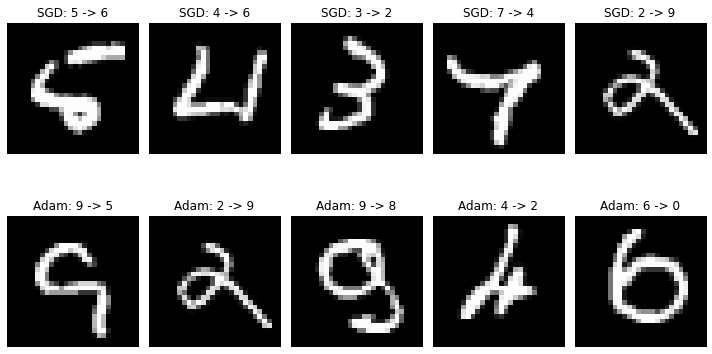

In [17]:
# Get the model's prediction on the test set
y_pred_sgd = model_sgd.predict(x_test)
y_pred_adam = model_adam.predict(x_test)

# Get the index of incorrectly predicted samples
misclassified_sgd = np.where(np.argmax(y_pred_sgd, axis=1) != np.argmax(y_test, axis=1))[0]
misclassified_adam = np.where(np.argmax(y_pred_adam, axis=1) != np.argmax(y_test, axis=1))[0]

# Show some incorrectly predicted images
plt.figure(figsize=(10, 6))

for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[misclassified_sgd[i]].reshape((28, 28)), cmap='gray')
    plt.title(f"SGD: {np.argmax(y_test[misclassified_sgd[i]])} -> {np.argmax(y_pred_sgd[misclassified_sgd[i]])}")
    plt.axis('off')

    plt.subplot(2, 5, i + 6)
    plt.imshow(x_test[misclassified_adam[i]].reshape((28, 28)), cmap='gray')
    plt.title(f"Adam: {np.argmax(y_test[misclassified_adam[i]])} -> {np.argmax(y_pred_adam[misclassified_adam[i]])}")
    plt.axis('off')

plt.tight_layout()
plt.show()